In [56]:
import numpy as np
from astropy.io import fits

tempimagename = fits.open(f"/users/kushpatel/20250908_07in_NGC6946/LIGHT/master_science-g'-2.fits")
temp_data = tempimagename[0].data
tempimagename1 = fits.open(f"/users/kushpatel/20251015_07in_NGC6946/LIGHT/master_science-g'-2.fits")
temp_data1 = tempimagename1[0].data
tempimagename2 = fits.open(f"/users/kushpatel/20250928_07in_NGC6946/LIGHT/master_science-g'-2.fits")
temp_data2 = tempimagename2[0].data


print(np.max(temp_data))
print(np.max(temp_data1))
print(np.max(temp_data2))

667167.44
1312587.6
594804.7


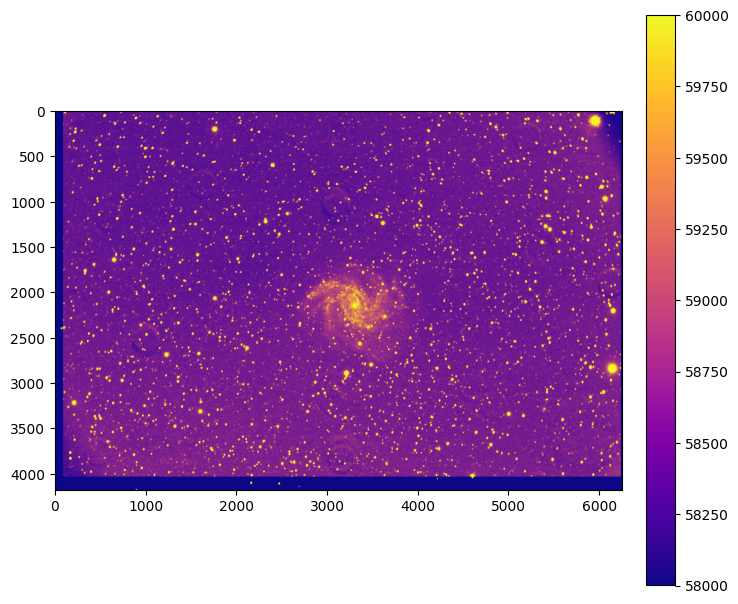

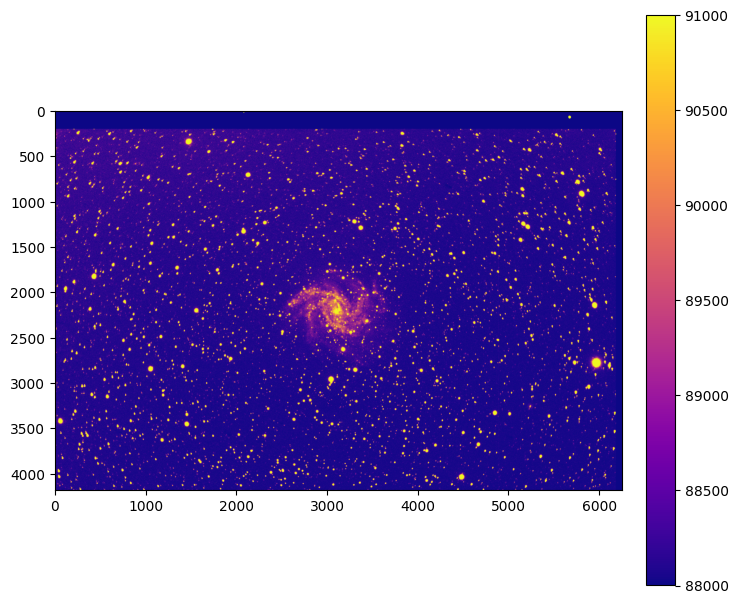

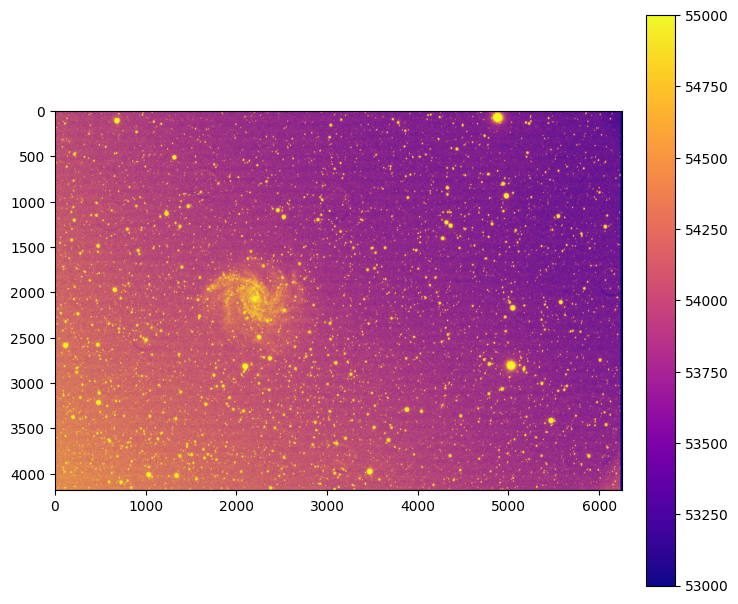

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data,vmin=58000,vmax=60000,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data1,vmin=88000,vmax=91000,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data2,vmin=53000,vmax=55000,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

# Double stars overlap/touching each other, so we will do aperture photometry that encompass both stars


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def manual_ellipse_picker(image, col0, row0, rad1_0, rad2_0,
                          vmin=None, vmax=None):

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap='plasma')
    plt.colorbar(im, fraction=0.046, pad=0.04)

    ax.set_title("Adjust Ellipse for Initial Guess")

    p = np.linspace(0, 2*np.pi, 400)

    # Initial ellipse
    xc = col0 + rad1_0*np.cos(p)
    yc = row0 + rad2_0*np.sin(p)
    ellipse_line, = ax.plot(xc, yc, 'w', lw=2)

    # Sliders
    ax_a = plt.axes([0.2, 0.02, 0.6, 0.02])
    ax_b = plt.axes([0.2, 0.05, 0.6, 0.02])

    s_a = Slider(ax_a, "rad1", 5, 900, valinit=rad1_0)
    s_b = Slider(ax_b, "rad2", 5, 900, valinit=rad2_0)

    def update(val):
        rad1 = s_a.val
        rad2 = s_b.val
        xc = col0 + rad1*np.cos(p)
        yc = row0 + rad2*np.sin(p)
        ellipse_line.set_data(xc, yc)
        fig.canvas.draw_idle()

    s_a.on_changed(update)
    s_b.on_changed(update)

    plt.show()

    print("\n✅ After closing the window, use these initial values:")
    print(f"col = {col0}")
    print(f"row = {row0}")
    print(f"rad1 = {s_a.val:.1f}")
    print(f"rad2 = {s_b.val:.1f}")

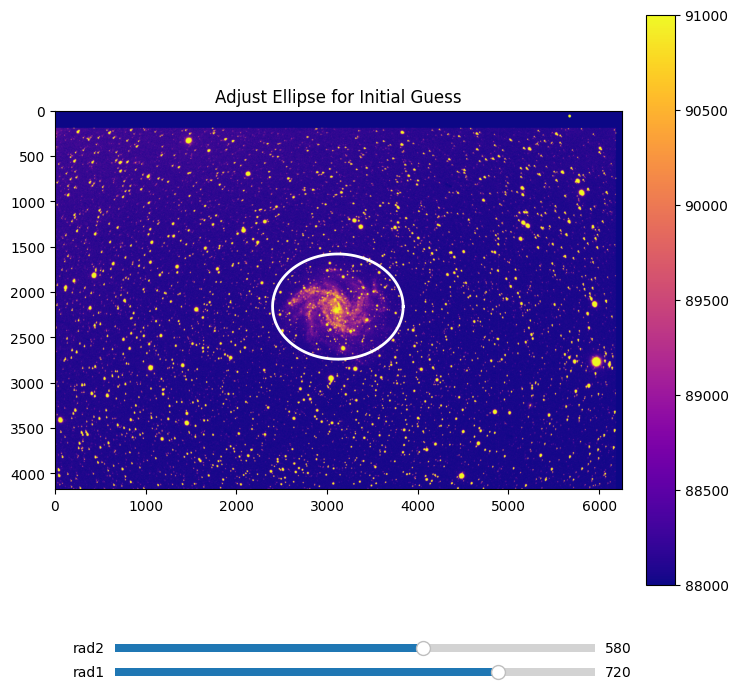


✅ After closing the window, use these initial values:
col = 3120
row = 2160
rad1 = 720.0
rad2 = 580.0


In [59]:
manual_ellipse_picker(
    temp_data1,
    col0=3120,      # your estimated source X
    row0=2160,      # your estimated source Y
    rad1_0=720,
    rad2_0=580,
    vmin=88000,
    vmax=91000
)

In [60]:
# The following are determined from visual inspection of the image in DS9
# Center coordinates for an aperture that can encompass both stars is ~(634,370)
# Rough pixels from center to get both is ~23 pixels

# Center coordinates for the mystery star is ~(69,101.5)
# Rough pixels from center to get star is ~7 pixels


In [61]:
tempimagename3 = fits.open(f"/users/kushpatel/20251003_07in_NGC6946/LIGHT/master_science-ha-2.fits")
temp_data3 = tempimagename3[0].data
tempimagename4 = fits.open(f"/users/kushpatel/20251015_07in_NGC6946/LIGHT/master_science-ha.fits")
temp_data4 = tempimagename4[0].data
tempimagename4_2 = fits.open(f"/users/kushpatel/20251015_07in_NGC6946/LIGHT/master_science-ha-2.fits")
temp_data4_2 = tempimagename4_2[0].data
tempimagename5 = fits.open(f"/users/kushpatel/20250928_07in_NGC6946/LIGHT/master_science-ha-2.fits")
temp_data5 = tempimagename5[0].data
tempimagename6 = fits.open(f"/users/kushpatel/20251009_07in_NGC6946/LIGHT/master_science-ha-2.fits")
temp_data6 = tempimagename6[0].data

print(np.max(temp_data))
print(np.max(temp_data1))
print(np.max(temp_data2))
print(np.max(temp_data3))

667167.44
1312587.6
594804.7
460842.03


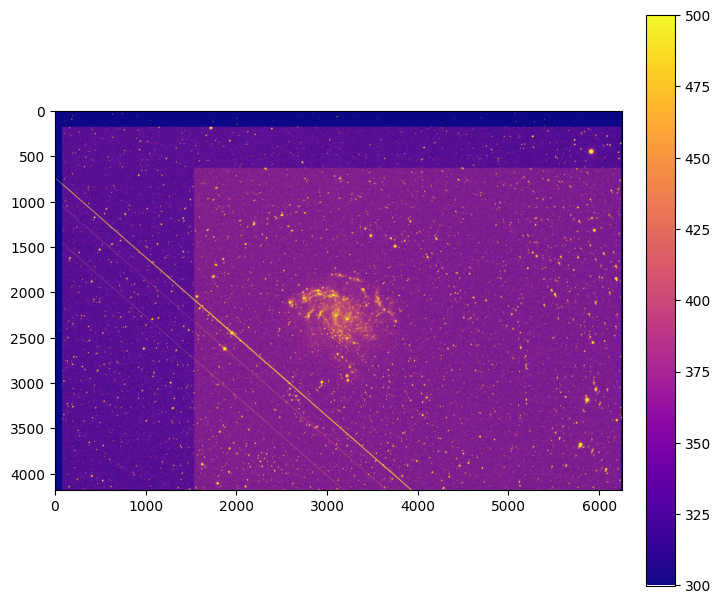

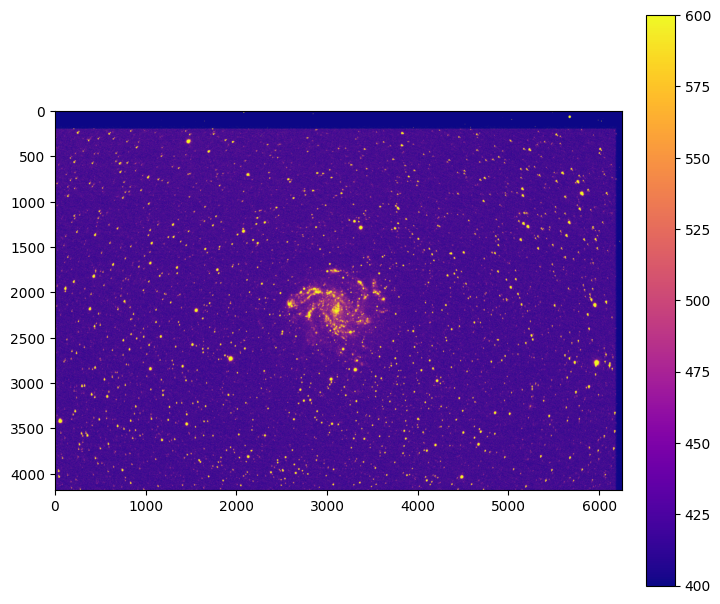

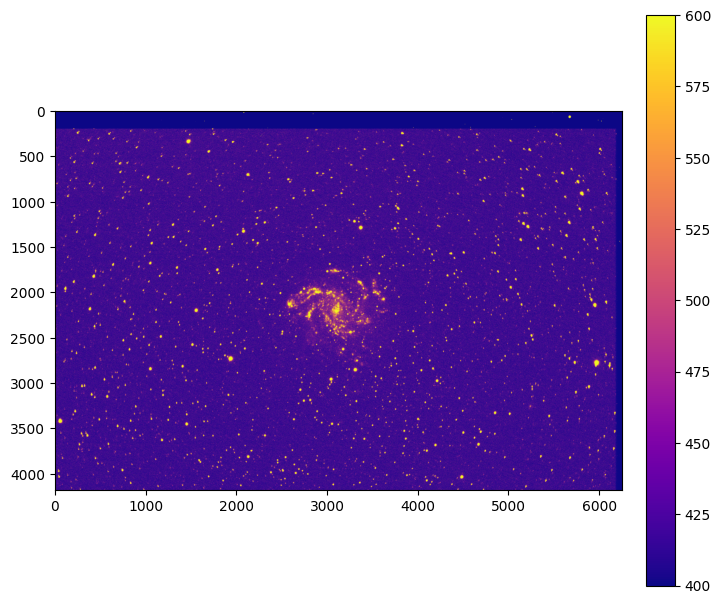

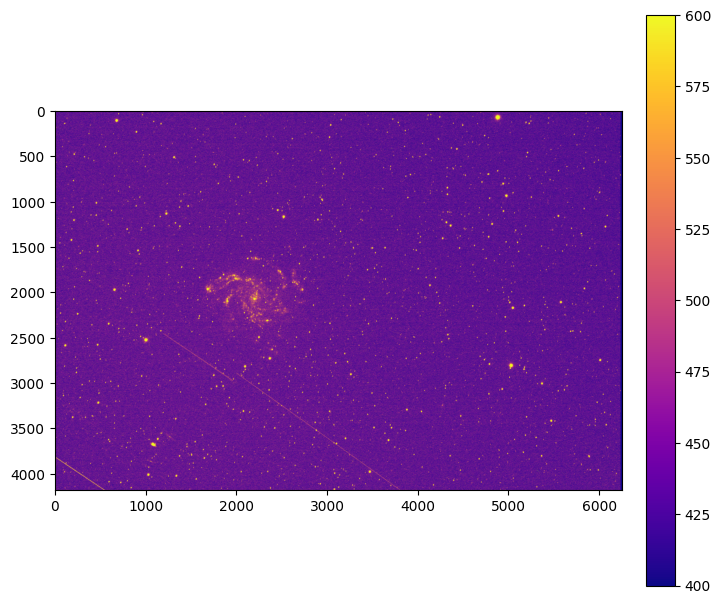

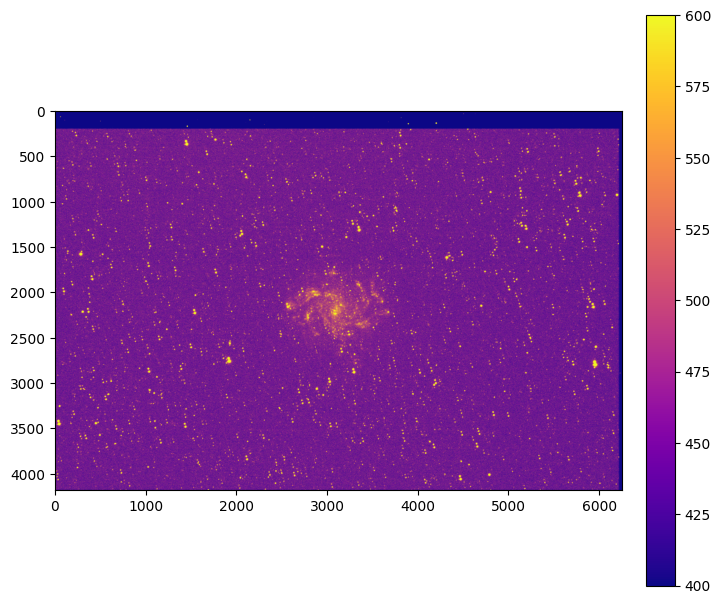

In [62]:
plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data3,vmin=300,vmax=500,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data4,vmin=400,vmax=600,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data4_2,vmin=400,vmax=600,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data5,vmin=400,vmax=600,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

plt.figure(figsize=[8,8])
fig = plt.imshow(temp_data6,vmin=400,vmax=600,cmap='plasma')
plt.colorbar(fig,fraction=0.046,pad=0.04)

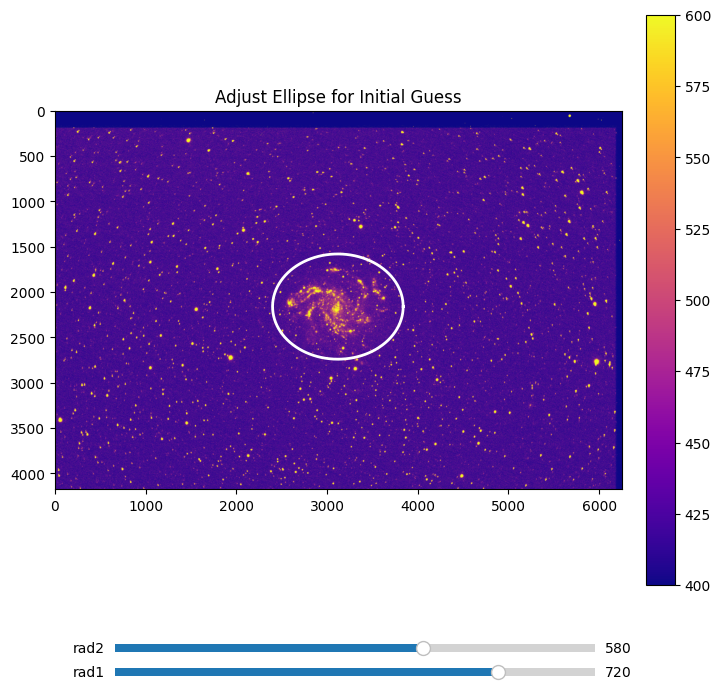


✅ After closing the window, use these initial values:
col = 3120
row = 2160
rad1 = 720.0
rad2 = 580.0


In [63]:
manual_ellipse_picker(
    temp_data4,
    col0=3120,      # your estimated source X
    row0=2160,      # your estimated source Y
    rad1_0=720,
    rad2_0=580,
    vmin=400,
    vmax=600
)

In [64]:
def aperE(im, col, row, rad1, rad2, ir1, ir2, or1, or2, Kccd, saturation=np.inf):
    """Original code by Professor Alberto Bolatto, edited by Alyssa Pagan, and
    translated to Python by ChongChong He, further edited by Orion Guiffreda.

    Before using aperE.m, rotate your image using imrotate(im,angle) so the
    major axis of your object is perpendicular or parallel to your x or y axis.

    APER(im,col,row,rad1,rad1,ir1,ir2,or1,or2,Kccd) Do aperture photometry of image "im"
    for a star, galaxy or nebula centered at the "row,col" coordinates, For an ellipse
    with a major and minor axis of "rad1,rad2" and an inner sky ellipse with a
    major and minor axis of (ir1,ir2)and outer sky ellipse of "or1,or2" with CCD
    gain of Kccd ADU/electron. Optionally, a 11th parameter can be passed
    with the saturation value for the CCD.
    """

    a, b = im.shape
    xx, yy = np.meshgrid(range(b), range(a))
    ixsrc = ((xx - col) / rad1) ** 2 + ((yy - row) / rad2) ** 2 <= 1
    ixsky = np.logical_and(
        (((xx - col) / or1) ** 2) + (((yy - row) / or2) ** 2) <= 1,
        (((xx - col) / ir1) ** 2) + (((yy - row) / ir2) ** 2) >= 1
    )
    length = max(ixsky.shape)
    sky = np.median(im[ixsky], axis=0)
    imixsrc = im[ixsrc]
    pix = imixsrc - sky
    sig = np.sqrt(imixsrc / Kccd)
    ssig = np.std(im[ixsky]) / np.sqrt(length) / Kccd
    flx = np.sum(pix) / Kccd
    err = np.sqrt(np.sum(sig) ** 2 + ssig ** 2)
    # The following is the actual noise of the flux recorded (equation error?)
    SNR = np.sqrt(np.sum(sig**2) + ssig ** 2)
    issat = 0
    if max(imixsrc) > saturation:
        issat = 1
    fw = np.copy(or1)
    ix = np.where(
        np.logical_and(
            np.logical_and(
                np.logical_and(xx >= col - 2 * fw, xx <= col + 2 * fw),
                yy >= row - 2 * fw
            ),
            yy <= row + 2 * fw
        )
    )
    aa = np.sum(np.logical_and(xx[0, :] >= col - 2 * fw,
                               xx[0, :] <= col + 2 * fw))
    bb = np.sum(np.logical_and(yy[:, 0] >= row - 2 * fw,
                               yy[:, 0] <= row + 2 * fw))
    px = np.reshape(xx[ix], (bb, aa))
    py = np.reshape(yy[ix], (bb, aa))
    pz = np.reshape(im[ix], (bb, aa))
    plt.figure()
    plt.imshow(pz, extent=[px[0, 0], px[0, -1], py[0, 0], py[-1, 0]])
    plt.tight_layout()
    # if not np.isempty(imixsrc):
    #     np.caxis(np.concatenate((sky, np.array([max(imixsrc)]))))

    p = np.arange(360) * np.pi / 180
    xc = np.cos(p)
    yc = np.sin(p)
    plt.plot(col+rad1*xc, row+rad2*yc, 'w')
    plt.plot(col+ir1*xc, row+ir2*yc, 'r')
    plt.plot(col+or1*xc, row+or2*yc, 'r')
    if issat:
        plt.text(col, row, 'CHECK SATURATION', ha='center', color='w',
                 va='top', fontweight='bold')
        print('At the peak this source has {:0.0f} counts.'.format(
            max(imixsrc)))
        print('Judging by the number of counts, if this is a single exposure the')
        print('source is likely to be saturated. If this is the coadding of many')
        print('short exposures, check in one of them to see if this message appears.')
        print('If it does, you need to flag the source as bad in this output file.')
    plt.tight_layout()
    plt.savefig("aperE_img.pdf")
    return flx, err, SNR

In [65]:
# Made to reduce runtime

def aperE_graphless(im, col, row, rad1, rad2, ir1, ir2, or1, or2, Kccd, saturation=np.inf):
    """Original code by Professor Alberto Bolatto, edited by Alyssa Pagan, and
    translated to Python by ChongChong He, further edited by Orion Guiffreda.

    Before using aperE.m, rotate your image using imrotate(im,angle) so the
    major axis of your object is perpendicular or parallel to your x or y axis.

    APER(im,col,row,rad1,rad1,ir1,ir2,or1,or2,Kccd) Do aperture photometry of image "im"
    for a star, galaxy or nebula centered at the "row,col" coordinates, For an ellipse
    with a major and minor axis of "rad1,rad2" and an inner sky ellipse with a
    major and minor axis of (ir1,ir2)and outer sky ellipse of "or1,or2" with CCD
    gain of Kccd ADU/electron. Optionally, a 11th parameter can be passed
    with the saturation value for the CCD.
    """

    a, b = im.shape
    xx, yy = np.meshgrid(range(b), range(a))
    ixsrc = ((xx - col) / rad1) ** 2 + ((yy - row) / rad2) ** 2 <= 1
    ixsky = np.logical_and(
        (((xx - col) / or1) ** 2) + (((yy - row) / or2) ** 2) <= 1,
        (((xx - col) / ir1) ** 2) + (((yy - row) / ir2) ** 2) >= 1
    )
    length = max(ixsky.shape)
    sky = np.median(im[ixsky], axis=0)
    imixsrc = im[ixsrc]
    pix = imixsrc - sky
    sig = np.sqrt((imixsrc) / Kccd)
    ssig = np.std(im[ixsky]) / np.sqrt(length) / Kccd
    flx = np.sum(pix) / Kccd
    err = np.sqrt(np.sum(sig) ** 2 + ssig ** 2)
    # The following is the actual noise of the flux recorded (equation error?)
    SNR = np.sqrt(np.sum(imixsrc / Kccd) + ssig ** 2) # sig ** 2 but no sqrt applied first
    issat = 0
    return flx, err, SNR


In [66]:
def aperE_graphless_new(im, col, row, rad1, rad2, ir1, ir2, or1, or2, Kccd, saturation=np.inf):
# Aperture Photometry
    a, b = im.shape

    xx, yy = np.meshgrid(range(b), range(a))

    ixsrc = ((xx - col) / rad1) ** 2 + ((yy - row) / rad2) ** 2 <= 1  # returns a boolean array same size as the image where True is part of the target aperture

    ixsky = np.logical_and(
        (((xx - col) / or1) ** 2) + (((yy - row) / or2) ** 2) <= 1,
        (((xx - col) / ir1) ** 2) + (((yy - row) / ir2) ** 2) >= 1,
    )  # returns a boolean array same size as the image where True is part of the sky annulus and False is not.

    src_pixels = im[ixsrc]  # returns a 1D array of pixel values in ADUs of the target aperture pixels
    num_src = len(src_pixels)
    src_err = np.sqrt(
        src_pixels / Kccd
    )  # Poisson read noise. dividing by the Kccd converts ADU to electrons.

    sky_pixels = im[ixsky]  # returns a 1D array of pixel values of the sky annulus
    num_sky = len(sky_pixels)
    sky = np.median(sky_pixels)  # Median value of the sky annulus is taken as 'the' sky brightness. To be subtracted from source pixels.
    sky_err = np.sqrt(
        sky_pixels * num_src / num_sky / Kccd
    )  # Sky error normalized and scaled by the number of sky pixels in the target aperture, and then converted to electrons

    net_pixels = (src_pixels - sky)  # each src pixel is corrected by subtracting the median sky signal

    flx = np.sum(net_pixels) / Kccd  # final flux value of the source in electrons
    total_err = (
        np.sqrt(np.sum(src_err**2) + np.sum(sky_err**2)) / Kccd
    )  # final error through error propagation on the flx term.

    return flx, total_err

In [67]:
def aperE_graphless_new_test(im, col, row, rad1, rad2, ir1, ir2, or1, or2, Kccd, saturation=np.inf):
# Aperture Photometry
    a, b = im.shape

    xx, yy = np.meshgrid(range(b), range(a))

    ixsrc = ((xx - col) / rad1) ** 2 + ((yy - row) / rad2) ** 2 <= 1  # returns a boolean array same size as the image where True is part of the target aperture

    ixsky = np.logical_and(
        (((xx - col) / or1) ** 2) + (((yy - row) / or2) ** 2) <= 1,
        (((xx - col) / ir1) ** 2) + (((yy - row) / ir2) ** 2) >= 1,
    )  # returns a boolean array same size as the image where True is part of the sky annulus and False is not.

    src_pixels = im[ixsrc]  # returns a 1D array of pixel values in ADUs of the target aperture pixels

    med = np.median(src_pixels)

    for index, pix in enumerate(src_pixels):
        if pix > 60000:
            src_pixels[index] = med
    num_src = len(src_pixels)
    src_err = np.sqrt(
        src_pixels / Kccd
    )  # Poisson read noise. dividing by the Kccd converts ADU to electrons.

    sky_pixels = im[ixsky]  # returns a 1D array of pixel values of the sky annulus
    num_sky = len(sky_pixels)
    sky = np.median(sky_pixels)  # Median value of the sky annulus is taken as 'the' sky brightness. To be subtracted from source pixels.
    sky_err = np.sqrt(
        sky_pixels * num_src / num_sky / Kccd
    )  # Sky error normalized and scaled by the number of sky pixels in the target aperture, and then converted to electrons

    net_pixels = (src_pixels - sky)  # each src pixel is corrected by subtracting the median sky signal

    flx = np.sum(net_pixels) / Kccd  # final flux value of the source in electrons
    total_err = (np.sqrt(np.sum(src_err**2) + np.sum(sky_err**2)) / Kccd)  # final error through error propagation on the flx term.
    return flx, total_err


In [68]:
# We can ser inner and outer radii arbitrarily far out, as sky is fairly uniform, and only scales the net flux determined from the star alone
# But relative flux magnetiude should remain same for various aperture sizes

# Aperture size for double stars
"""
col = 3120
row = 2160
rad1_0=720
rad2_0=580
"""
2160
a = 720
b = 580
n = 300
ir = 1130
or_ = 1170
apertures_one = np.linspace(a - n, a + n, 1 + 2*n)
apertures_two = np.linspace(b - n, b + n, 1 + 2*n)
noise1_list = []
flux_list = []
snr1_list = []
for ap in range(len(apertures_one)):
    flux, noise1 = aperE_graphless_new(temp_data6, 3120, 2160, apertures_one[ap], apertures_two[ap], ir, ir, or_, or_, 1/0.242862924933434) # EGAIN found from header of uncalibrated science images
    noise1_list.append(noise1)
    flux_list.append(flux)
    snr1_list.append(flux/noise1) # SNR is flux divided by noise





Text(0, 0.5, 'Change in Flux (# of e-)')

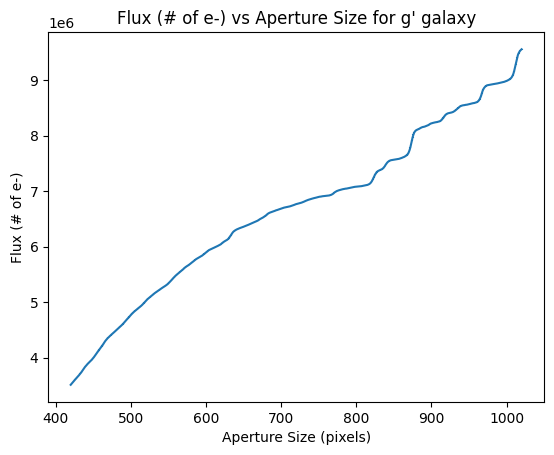

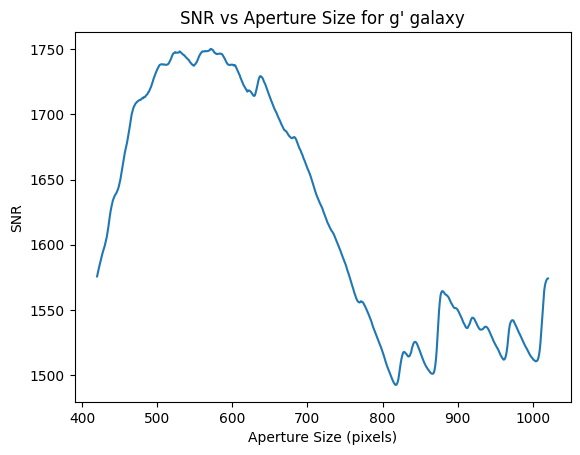

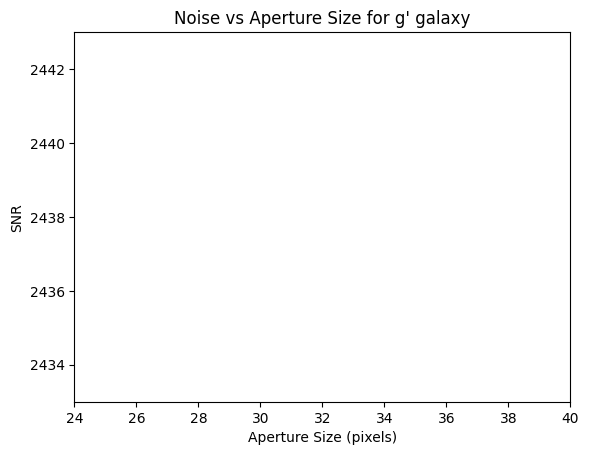

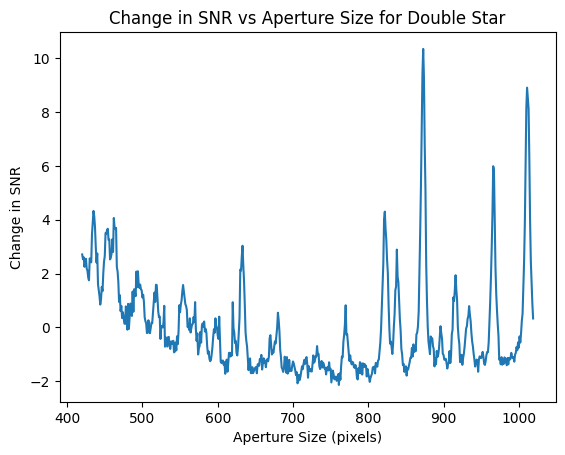

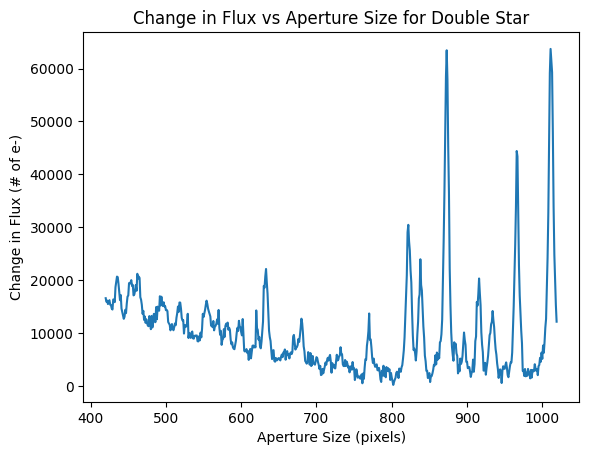

In [69]:
plt.figure()
plt.title('Flux (# of e-) vs Aperture Size for g\' galaxy')
plt.errorbar(apertures_one, flux_list, noise1_list, label='Flux')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('Flux (# of e-)')

# Ends at aperture size ~15 as there's a sig error in the function after due to negative sqrt)
plt.figure()
plt.title('SNR vs Aperture Size for g\' galaxy')
plt.plot(apertures_one, snr1_list, label='SNR')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('SNR')

plt.figure()
plt.title('Noise vs Aperture Size for g\' galaxy')
plt.xlim(24,40)
plt.ylim(2433,2443)
plt.plot(apertures_one, noise1_list, label='SNR')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('SNR')


list_of_changes = []
change_flux = []

for i in range(len(snr1_list)-1):
    change = snr1_list[i+1] - snr1_list[i]
    list_of_changes.append(change)

for i in range(len(flux_list)-1):
    change_f = flux_list[i+1] - flux_list[i]
    change_flux.append(change_f)

plt.figure()
plt.title('Change in SNR vs Aperture Size for Double Star')
plt.plot(apertures_one[:-1], list_of_changes, label='Change in SNR')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('Change in SNR')

plt.figure()
plt.title('Change in Flux vs Aperture Size for Double Star')
plt.plot(apertures_one[:-1], change_flux, label='Change in Flux')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('Change in Flux (# of e-)')


In [70]:
import numpy as np

def max_snr_in_segment(apertures, snr_list, min_ap, max_ap):
    """
    Find the aperture (and index) with maximum SNR inside [min_ap, max_ap].
    apertures : 1D array-like of aperture sizes
    snr_list  : 1D array-like of SNR values (same length)
    min_ap,max_ap : numeric bounds (inclusive)

    Returns: (global_index, aperture_value, snr_value)
    or (None,None,None) if nothing valid.
    """
    apertures = np.asarray(apertures)
    snr_arr = np.asarray(snr_list, dtype=float)

    # mask out invalid entries
    valid = np.isfinite(snr_arr)

    # mask within requested aperture window
    in_window = (apertures >= min_ap) & (apertures <= max_ap)

    mask = valid & in_window
    if not mask.any():
        return None, None, None

    idx_local = np.nanargmax(snr_arr[mask])            # index into filtered array
    # map local index back to global index
    global_indices = np.nonzero(mask)[0]
    global_idx = global_indices[idx_local]

    return int(global_idx), float(apertures[global_idx]), float(snr_arr[global_idx])

In [71]:
index, d, c = max_snr_in_segment(apertures_one, snr1_list, 600, 700)

In [72]:
print(snr1_list[index])
print(noise1_list[index])
print(flux_list[index])
print(apertures_one[index])
print(apertures_two[index])


1737.9893
3391.2732
5893996.5
600.0
460.0


In [73]:
# We can ser inner and outer radii arbitrarily far out, as sky is fairly uniform, and only scales the net flux determined from the star alone
# But relative flux magnetiude should remain same for various aperture sizes

# Aperture size for double stars
"""
col = 3120
row = 2160
rad1_0=720
rad2_0=580
"""
2160
a = 720
b = 620
n = 300
ir = 1130
or_ = 1170
apertures_one = np.linspace(a - n, a + n, 1 + 2*n)
apertures_two = np.linspace(b - n, b + n, 1 + 2*n)
noise2_list = []
flux2_list = []
snr2_list = []
for ap in range(len(apertures_one)):
    flux2, noise2 = aperE_graphless_new(temp_data4_2, 3120, 2160, apertures_one[ap], apertures_two[ap], ir, ir, or_, or_, 1/0.242862924933434) # EGAIN found from header of uncalibrated science images
    noise2_list.append(noise2)
    flux2_list.append(flux2)
    snr2_list.append(flux2/noise2) # SNR is flux divided by noise



/var/folders/g0/zbxc45cj24d8l62kv0qz0tnh0000gn/T/ipykernel_31573/2393294752.py:16: RuntimeWarning: invalid value encountered in sqrt
  src_err = np.sqrt(


Max BEFORE: 238033.23
411.8045


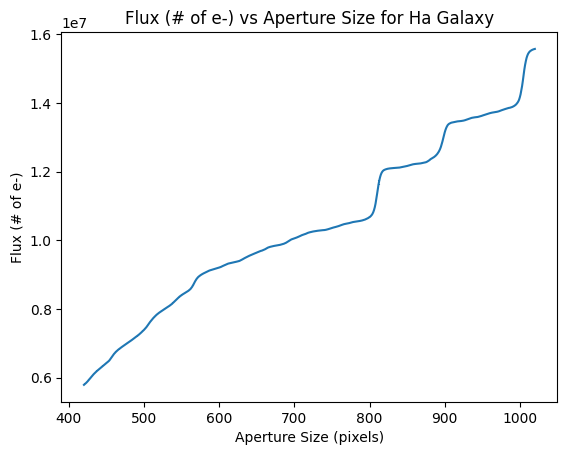

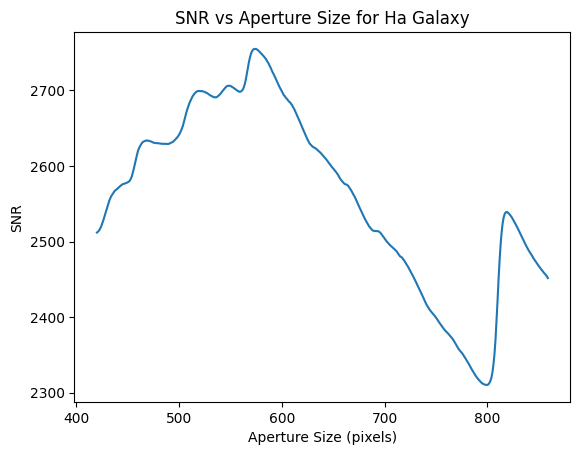

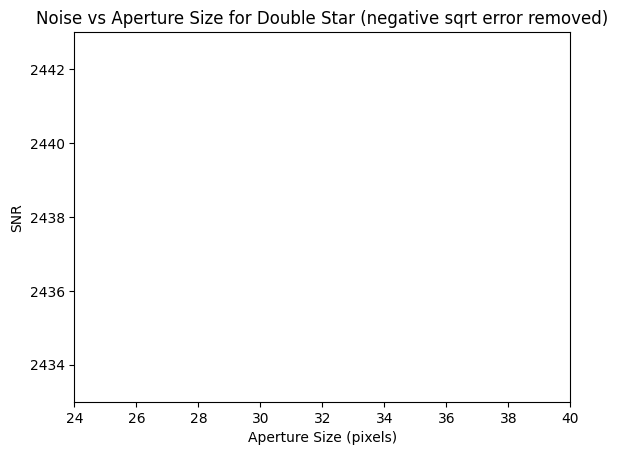

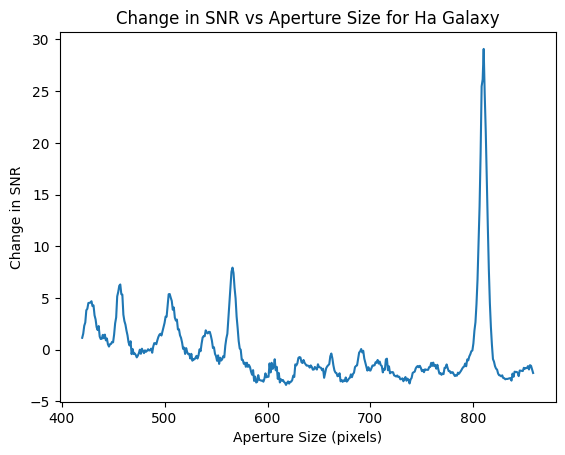

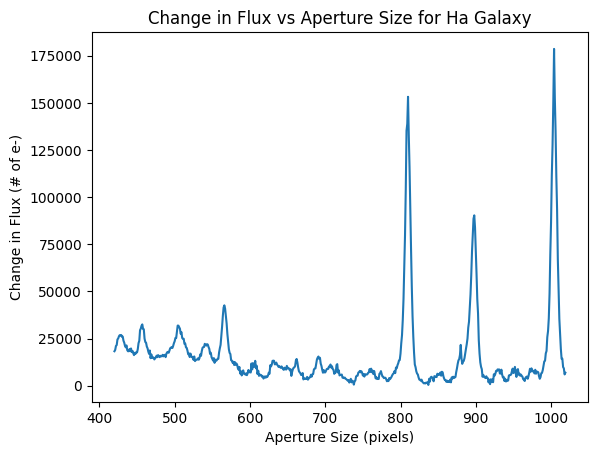

In [74]:
plt.figure()
plt.title('Flux (# of e-) vs Aperture Size for Ha Galaxy')
plt.errorbar(apertures_one, flux2_list, noise2_list, label='Flux')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('Flux (# of e-)')

# Ends at aperture size ~15 as there's a sig error in the function after due to negative sqrt)
plt.figure()
plt.title('SNR vs Aperture Size for Ha Galaxy')
plt.plot(apertures_one, snr2_list, label='SNR')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('SNR')

plt.figure()
plt.title('Noise vs Aperture Size for Double Star (negative sqrt error removed)')
plt.xlim(24,40)
plt.ylim(2433,2443)
plt.plot(apertures_one, noise2_list, label='SNR')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('SNR')


list_of_changes = []
change_flux = []

for i in range(len(snr2_list)-1):
    change = snr2_list[i+1] - snr2_list[i]
    list_of_changes.append(change)

for i in range(len(flux2_list)-1):
    change_f = flux2_list[i+1] - flux2_list[i]
    change_flux.append(change_f)

plt.figure()
plt.title('Change in SNR vs Aperture Size for Ha Galaxy')
plt.plot(apertures_one[:-1], list_of_changes, label='Change in SNR')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('Change in SNR')

plt.figure()
plt.title('Change in Flux vs Aperture Size for Ha Galaxy')
plt.plot(apertures_one[:-1], change_flux, label='Change in Flux')
plt.xlabel('Aperture Size (pixels)')
plt.ylabel('Change in Flux (# of e-)')

print("Max BEFORE:", np.nanmax(temp_data4))
print(np.nanmedian(temp_data4))
# print("Max AFTER :", np.nanmax(master_science))


In [75]:
index, d, c = max_snr_in_segment(apertures_one, snr2_list, 500, 600)

In [76]:
print(snr2_list[index])
print(noise2_list[index])
print(flux2_list[index])
print(apertures_one[index])
print(apertures_two[index])

2754.9482
3255.363
8968357.0
574.0
474.0


In [77]:
# I can either choose 17 pixels for the aperture size as its still somewhat small and the flux and SNR begins to approach stability after
# Or I can choose 34 pixels to encompass both stars fully but have more background noise included, but has max SNR and is close to stable flux with little increase with size
# However, mystery star size is only ~7 pixels from DS9. Thus I will try both to see how much of a difference it makes.

# I will try both and see how much difference it makes in the final magnitude calculation

# Expected size for i_r = 1.5 - 2 * aperture size
# We can have o_r = i_r + 10 - 20 pixels


ir_list = np.arange(34*1.5//2 * 2, 34*2 + 1, 1)



In [78]:
# +11 and 12 look the most interesting for or, lets graph those specifically

ir_list = np.arange(34*1.5, 34*2 + 1, 1)
flux0_list = []
snr0_list = []
flux1_list = []
snr1_list = []
flux2_list = []
snr2_list = []
flux3_list = []
snr3_list = []
flux4_list = []
snr4_list = []
flux5_list = []
snr5_list = []
flux6_list = []
snr6_list = []
flux7_list = []
snr7_list = []
flux8_list = []
snr8_list = []
flux9_list = []
snr9_list = []
flux10_list = []
snr10_list = []

for i in range(len(ir_list)):
    ir = ir_list[i]
    or_0 = ir + 10
    or_1 = ir + 11
    or_2 = ir + 12
    or_3 = ir + 13
    or_4 = ir + 14
    or_5 = ir + 15
    or_6 = ir + 16
    or_7 = ir + 17
    or_8 = ir + 18
    or_9 = ir + 19
    or_10 = ir + 20
    flux0, error, noise0 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_0, or_0, 1/2.5199999809265137) # EGAIN found from header of uncalibrated science images
    flux1, error, noise1 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_1, or_1, 1/2.5199999809265137) # EGAIN found from header of uncalibrated science images
    flux2, error, noise2 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_2, or_2, 1/2.5199999809265137)
    flux3, error, noise3 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_3, or_3, 1/2.5199999809265137)
    flux4, error, noise4 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_4, or_4, 1/2.5199999809265137)
    flux5, error, noise5 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_5, or_5, 1/2.5199999809265137)
    flux6, error, noise6 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_6, or_6, 1/2.5199999809265137)
    flux7, error, noise7 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_7, or_7, 1/2.5199999809265137) 
    flux8, error, noise8 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_8, or_8, 1/2.5199999809265137)
    flux9, error, noise9 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_9, or_9, 1/2.5199999809265137)
    flux10, error, noise10 = aperE_graphless(temp_data, 633, 370, 34, 34, ir, ir, or_10, or_10, 1/2.5199999809265137)
    
    flux0_list.append(flux0)
    snr0_list.append(flux0/noise0)
    flux1_list.append(flux1)
    snr1_list.append(flux1/noise1)
    flux2_list.append(flux2)
    snr2_list.append(flux2/noise2)
    flux3_list.append(flux3)
    snr3_list.append(flux3/noise3)
    flux4_list.append(flux4)
    snr4_list.append(flux4/noise4)
    flux5_list.append(flux5)
    snr5_list.append(flux5/noise5)
    flux6_list.append(flux6)
    snr6_list.append(flux6/noise6)
    flux7_list.append(flux7)
    snr7_list.append(flux7/noise7)
    flux8_list.append(flux8)
    snr8_list.append(flux8/noise8)
    flux9_list.append(flux9)
    snr9_list.append(flux9/noise9)
    flux10_list.append(flux10)
    snr10_list.append(flux10/noise10)

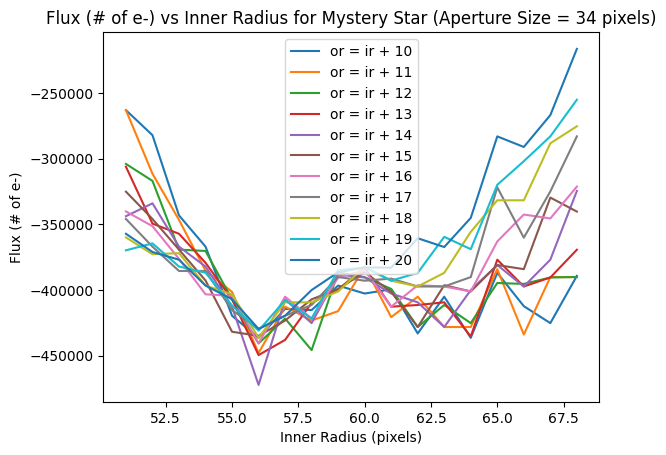

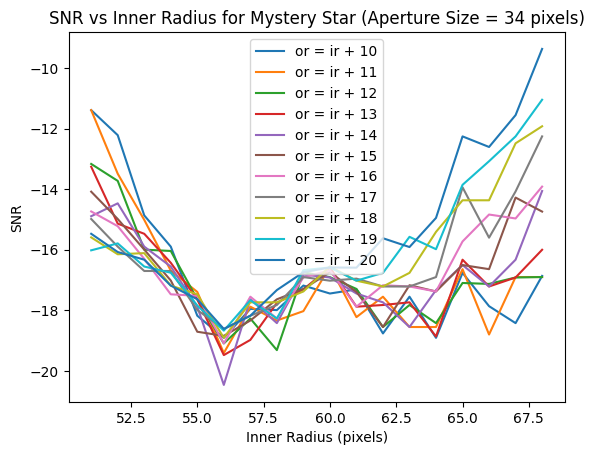

In [79]:
plt.figure()
plt.title('Flux (# of e-) vs Inner Radius for Mystery Star (Aperture Size = 34 pixels)')
plt.plot(ir_list, flux0_list, label='or = ir + 10')
plt.plot(ir_list, flux1_list, label='or = ir + 11')
plt.plot(ir_list, flux2_list, label='or = ir + 12')
plt.plot(ir_list, flux3_list, label='or = ir + 13')
plt.plot(ir_list, flux4_list, label='or = ir + 14')
plt.plot(ir_list, flux5_list, label='or = ir + 15')
plt.plot(ir_list, flux6_list, label='or = ir + 16')
plt.plot(ir_list, flux7_list, label='or = ir + 17')
plt.plot(ir_list, flux8_list, label='or = ir + 18')
plt.plot(ir_list, flux9_list, label='or = ir + 19')
plt.plot(ir_list, flux10_list, label='or = ir + 20')
plt.xlabel('Inner Radius (pixels)')
plt.ylabel('Flux (# of e-)')
plt.legend()

plt.figure()
plt.title('SNR vs Inner Radius for Mystery Star (Aperture Size = 34 pixels)')
plt.plot(ir_list, snr0_list, label='or = ir + 10')
plt.plot(ir_list, snr1_list, label='or = ir + 11')
plt.plot(ir_list, snr2_list, label='or = ir + 12')
plt.plot(ir_list, snr3_list, label='or = ir + 13')
plt.plot(ir_list, snr4_list, label='or = ir + 14')
plt.plot(ir_list, snr5_list, label='or = ir + 15')
plt.plot(ir_list, snr6_list, label='or = ir + 16')
plt.plot(ir_list, snr7_list, label='or = ir + 17')
plt.plot(ir_list, snr8_list, label='or = ir + 18')
plt.plot(ir_list, snr9_list, label='or = ir + 19')
plt.plot(ir_list, snr10_list, label='or = ir + 20')
plt.xlabel('Inner Radius (pixels)')
plt.ylabel('SNR')
plt.legend()

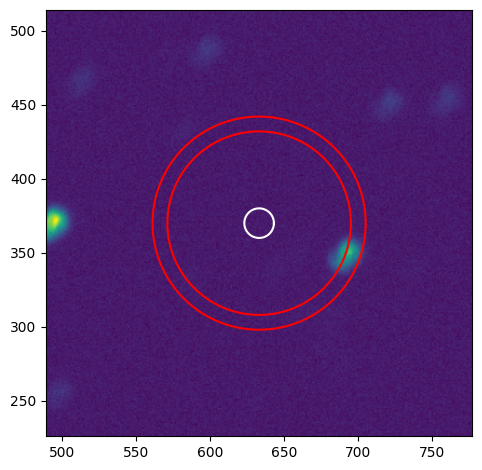

In [80]:
# This sudden increase in flux and SNR at large or is concerning for or >= ~72. I think its best that we leave the 34 pixel aperture size here, 
# or take it when its small. I don't think this Aperture size is normal anyways for the mystery star which is only ~7 pixels in size from DS9.
# As for such large ors, the sky annulus is too large for the image itself:

flux0, error, noise0 = aperE(temp_data, 633, 370, 10, 10, 62, 62, 72, 72, 1/2.5199999809265137)

# As you can see, the center point shifted on its own if you compare it to the first image produced when testing multiple apetures. 
# It's too large for aperE to handle properly.

In [81]:
# For aperture 17 pixels, its ir = 1.5 - 2 * aperture pixels, or = ir + 10 - 20 pixels
# Lets also graph for aperture size 17 pixels

ir_list = np.arange(17*1.5//2 * 2, 17*2 + 1, 1)
flux0_list = []
snr0_list = []
flux1_list = []
snr1_list = []
flux2_list = []
snr2_list = []
flux3_list = []
snr3_list = []
flux4_list = []
snr4_list = []
flux5_list = []
snr5_list = []
flux6_list = []
snr6_list = []
flux7_list = []
snr7_list = []
flux8_list = []
snr8_list = []
flux9_list = []
snr9_list = []
flux10_list = []
snr10_list = []

for i in range(len(ir_list)):
    ir = ir_list[i]
    or_0 = ir + 10
    or_1 = ir + 11
    or_2 = ir + 12
    or_3 = ir + 13
    or_4 = ir + 14
    or_5 = ir + 15
    or_6 = ir + 16
    or_7 = ir + 17
    or_8 = ir + 18
    or_9 = ir + 19
    or_10 = ir + 20
    flux0, error, noise0 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_0, or_0, 1/2.5199999809265137) # EGAIN found from header of uncalibrated science images
    flux1, error, noise1 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_1, or_1, 1/2.5199999809265137) # EGAIN found from header of uncalibrated science images
    flux2, error, noise2 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_2, or_2, 1/2.5199999809265137)
    flux3, error, noise3 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_3, or_3, 1/2.5199999809265137)
    flux4, error, noise4 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_4, or_4, 1/2.5199999809265137)
    flux5, error, noise5 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_5, or_5, 1/2.5199999809265137)
    flux6, error, noise6 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_6, or_6, 1/2.5199999809265137)
    flux7, error, noise7 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_7, or_7, 1/2.5199999809265137) 
    flux8, error, noise8 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_8, or_8, 1/2.5199999809265137)
    flux9, error, noise9 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_9, or_9, 1/2.5199999809265137)
    flux10, error, noise10 = aperE_graphless(temp_data, 633, 370, 15, 15, ir, ir, or_10, or_10, 1/2.5199999809265137)
    
    flux0_list.append(flux0)
    snr0_list.append(flux0/noise0)
    flux1_list.append(flux1)
    snr1_list.append(flux1/noise1)
    flux2_list.append(flux2)
    snr2_list.append(flux2/noise2)
    flux3_list.append(flux3)
    snr3_list.append(flux3/noise3)
    flux4_list.append(flux4)
    snr4_list.append(flux4/noise4)
    flux5_list.append(flux5)
    snr5_list.append(flux5/noise5)
    flux6_list.append(flux6)
    snr6_list.append(flux6/noise6)
    flux7_list.append(flux7)
    snr7_list.append(flux7/noise7)
    flux8_list.append(flux8)
    snr8_list.append(flux8/noise8)
    flux9_list.append(flux9)
    snr9_list.append(flux9/noise9)
    flux10_list.append(flux10)
    snr10_list.append(flux10/noise10)



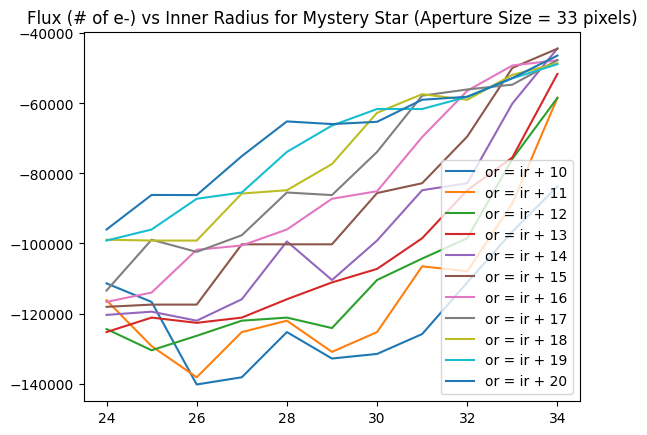

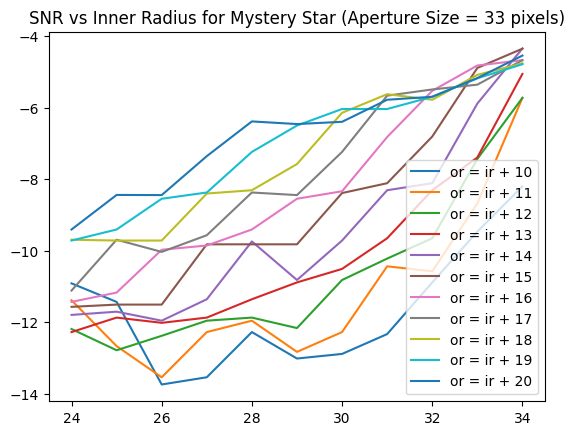

In [82]:
plt.figure()
plt.title('Flux (# of e-) vs Inner Radius for Mystery Star (Aperture Size = 33 pixels)')
plt.plot(ir_list, flux0_list, label='or = ir + 10')
plt.plot(ir_list, flux1_list, label='or = ir + 11')
plt.plot(ir_list, flux2_list, label='or = ir + 12')
plt.plot(ir_list, flux3_list, label='or = ir + 13')
plt.plot(ir_list, flux4_list, label='or = ir + 14')
plt.plot(ir_list, flux5_list, label='or = ir + 15')
plt.plot(ir_list, flux6_list, label='or = ir + 16')
plt.plot(ir_list, flux7_list, label='or = ir + 17')
plt.plot(ir_list, flux8_list, label='or = ir + 18')
plt.plot(ir_list, flux9_list, label='or = ir + 19')
plt.plot(ir_list, flux10_list, label='or = ir + 20')
plt.legend()

plt.figure()
plt.title('SNR vs Inner Radius for Mystery Star (Aperture Size = 33 pixels)')
plt.plot(ir_list, snr0_list, label='or = ir + 10')
plt.plot(ir_list, snr1_list, label='or = ir + 11')
plt.plot(ir_list, snr2_list, label='or = ir + 12')
plt.plot(ir_list, snr3_list, label='or = ir + 13')
plt.plot(ir_list, snr4_list, label='or = ir + 14')
plt.plot(ir_list, snr5_list, label='or = ir + 15')
plt.plot(ir_list, snr6_list, label='or = ir + 16')
plt.plot(ir_list, snr7_list, label='or = ir + 17')
plt.plot(ir_list, snr8_list, label='or = ir + 18')
plt.plot(ir_list, snr9_list, label='or = ir + 19')
plt.plot(ir_list, snr10_list, label='or = ir + 20')
plt.legend()

The brightness is -87968.59375 and the uncertainty is 11505.88654755134 in e-. For double star system.
The brightness is -759982.1875 and the uncertainty is 9712.704264192314 in e-. For mystery star system.


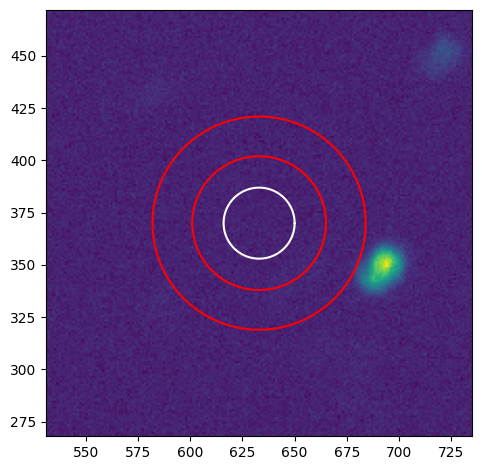

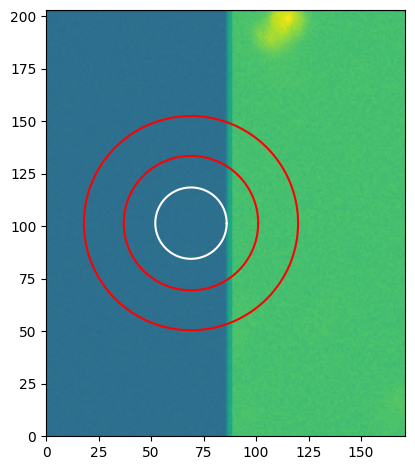

In [83]:
# Close to Best while having minimal ir and or is ir = 32, or = 51 pixels for aperture size 17 pixels. We will use this, as for apeture size 17, flux was starting to fall off afterwards,
# And SNR also begins to slow its increase

flux1, error, noise1 = aperE(temp_data, 633, 370, 17, 17, 32, 32, 51, 51, 1/2.5199999809265137)
flux1, error, noise1 = aperE_graphless(temp_data, 633, 370, 17, 17, 32, 32, 51, 51, 1/2.5199999809265137)

print(f"The brightness is {flux1} and the uncertainty is {noise1} in e-. For double star system.")

flux2, error, noise2 = aperE(temp_data, 69, 101.5, 17, 17, 32, 32, 51, 51, 1/2.5199999809265137)
flux2, error, noise2 = aperE_graphless(temp_data, 69, 101.5, 17, 17, 32, 32, 51, 51, 1/2.5199999809265137)

print(f"The brightness is {flux2} and the uncertainty is {noise2} in e-. For mystery star system.")



In [84]:
def instrumental_magnitude(flux, flux_uncertainty):
    "Compute the magnitude and its uncertainty from flux and flux uncertainty."
    magnitude = -2.5 * np.log10(flux) + 2.5 * np.log10(0.15)
    magnitude_uncertainty = (2.5 / np.log(10)) * (flux_uncertainty / flux)
    return magnitude, magnitude_uncertainty

# uncertainty in time is negligible by desmial places given in header

In [85]:
mag1, unmag1 = instrumental_magnitude(flux1, noise1)

mag2, unmag2 = instrumental_magnitude(flux2, noise2)

print(f"The instrumental magnitude is {mag1} +/- {unmag1} for double star system.")
print(f"The instrumental magnitude is {mag2} +/- {unmag2} for mystery star system.")

The instrumental magnitude is nan +/- -0.14200929058861997 for double star system.
The instrumental magnitude is nan +/- -0.013875897144947576 for mystery star system.


/var/folders/g0/zbxc45cj24d8l62kv0qz0tnh0000gn/T/ipykernel_31573/1299295072.py:3: RuntimeWarning: invalid value encountered in log10
  magnitude = -2.5 * np.log10(flux) + 2.5 * np.log10(0.15)


In [86]:
# We know that the apparent magnitude of the double stars is 2.29 from the JC-B.
# Thus we can use this to calibrate the mystery star's apparent magnitude.
# As uncertainty in given magnitude isnt given, assume it's negligible. Thus unZ is just uncertainty in instrumental magnitude of reference star

Z = 2.29 - mag1
unZ = unmag1

def apparent_magnitude(flux, flux_uncertainty):
    "Compute the magnitude and its uncertainty from flux and flux uncertainty."
    magnitude = -2.5 * np.log10(flux) + 2.5 * np.log10(0.15) + Z
    magnitude_uncertainty = np.sqrt(((2.5 / np.log(10)) * (flux_uncertainty / flux))**2 + unZ**2)
    return magnitude, magnitude_uncertainty

print(f"Calibration constant Z is {Z} +/- {unZ}")

Calibration constant Z is nan +/- -0.14200929058861997


In [87]:
# Function to compute true magnitude from flux and flux uncertainty

app_mag1, unapp_mag1 = apparent_magnitude(flux1, noise1)
app_mag2, unapp_mag2 = apparent_magnitude(flux2, noise2)

print(f"The apparent magnitude is {app_mag1} +/- {unapp_mag1} for double star system.")

print(f"The apparent magnitude is {app_mag2} +/- {unapp_mag2} for mystery star system.")



The apparent magnitude is nan +/- 0.2008314647334083 for double star system.
The apparent magnitude is nan +/- 0.14268559540142892 for mystery star system.


/var/folders/g0/zbxc45cj24d8l62kv0qz0tnh0000gn/T/ipykernel_31573/1505584059.py:10: RuntimeWarning: invalid value encountered in log10
  magnitude = -2.5 * np.log10(flux) + 2.5 * np.log10(0.15) + Z
